 # Student grades prediction

## Project Description

### The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.
### Columns Description-  total 43 columns
### -Seat No : The enrolled number of candidate that took the exams

### CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
### All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidate took exam


In [71]:
#importing the necessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
grades = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
grades.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [73]:
grades.shape

(571, 43)

In [74]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [75]:
grades.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [76]:
#renaming the columns hs-105/12 and hs-205/20 as hs-105 and hs-205
grades.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [77]:
#filling the missing values
grades = grades.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [78]:
grades.isna().sum()

Seat No.    0
PH-121      0
HS-101      0
CY-105      0
HS-105      0
MT-111      0
CS-105      0
CS-106      0
EL-102      0
EE-119      0
ME-107      0
CS-107      0
HS-205      0
MT-222      0
EE-222      0
MT-224      0
CS-210      0
CS-211      0
CS-203      0
CS-214      0
EE-217      0
CS-212      0
CS-215      0
MT-331      0
EF-303      0
HS-304      0
CS-301      0
CS-302      0
TC-383      0
MT-442      0
EL-332      0
CS-318      0
CS-306      0
CS-312      0
CS-317      0
CS-403      0
CS-421      0
CS-406      0
CS-414      0
CS-419      0
CS-423      0
CS-412      0
CGPA        0
dtype: int64

In [79]:
grades.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [80]:
#Droping the Seat No. column 
grades.drop('Seat No.',axis = 1,inplace = True)

## Converting the Categorical columns to numerical 

In [81]:
print(grades['PH-121'].unique())
print(grades['HS-101'].unique())
print(grades['CY-105'].unique())
print(grades['EL-102'].unique())

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+' 'WU' 'F']


In [82]:
for column in grades.columns:
    
    grades[column]=grades[column].replace('A+',4.0)
    grades[column]=grades[column].replace('A',4.0)
    grades[column]=grades[column].replace('A-',3.7)
    grades[column]=grades[column].replace('B+',3.4)
    grades[column]=grades[column].replace('B',3.0)
    grades[column]=grades[column].replace('B-',2.7)
    grades[column]=grades[column].replace('C+',2.4)
    grades[column]=grades[column].replace('C',2.0)
    grades[column]=grades[column].replace('C-',1.7)
    grades[column]=grades[column].replace('D+',1.4)
    grades[column]=grades[column].replace('D',1.0)
    grades[column]=grades[column].replace('F',0.0)
    grades[column]=grades[column].replace('WU',0.0)
    grades[column]=grades[column].replace('W',0)
    grades[column]=grades[column].replace('I',0)

In [83]:
grades.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [84]:
#checking the correlation of the columns
grades.corr()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.403916,0.634998,0.542404,0.491448,0.670488,0.294662,0.430898,0.653517,0.560114,...,0.017554,0.488370,0.322690,0.332941,0.273677,0.181826,0.434388,0.081660,0.231122,0.678066
HS-101,0.403916,1.000000,0.347955,0.484764,0.449556,0.432621,0.361570,0.364790,0.309038,0.352839,...,0.221540,0.409697,0.243646,0.340108,0.309811,0.271739,0.283499,0.240377,0.249635,0.562432
CY-105,0.634998,0.347955,1.000000,0.592358,0.572744,0.615777,0.404415,0.482410,0.536023,0.462786,...,0.223884,0.474775,0.465345,0.352003,0.138621,0.056944,0.421307,0.101452,0.032283,0.671831
HS-105,0.542404,0.484764,0.592358,1.000000,0.532648,0.527830,0.522210,0.377415,0.457887,0.378209,...,0.284224,0.503937,0.494668,0.430843,0.194099,0.127730,0.467260,0.236596,0.136358,0.659114
MT-111,0.491448,0.449556,0.572744,0.532648,1.000000,0.426058,0.543480,0.573076,0.441939,0.483733,...,0.466358,0.570492,0.411811,0.525131,0.276972,0.234948,0.499176,0.380456,0.257067,0.743227
CS-105,0.670488,0.432621,0.615777,0.527830,0.426058,1.000000,0.283559,0.357784,0.586035,0.480496,...,0.046015,0.397065,0.268677,0.269026,0.239135,0.152510,0.317141,0.044027,0.156766,0.627746
CS-106,0.294662,0.361570,0.404415,0.522210,0.543480,0.283559,1.000000,0.356170,0.263301,0.298441,...,0.480554,0.418149,0.458734,0.408368,0.144621,0.100997,0.440097,0.359455,0.146583,0.571756
EL-102,0.430898,0.364790,0.482410,0.377415,0.573076,0.357784,0.356170,1.000000,0.433956,0.457914,...,0.298903,0.462369,0.294667,0.362650,0.261229,0.268769,0.347477,0.345015,0.248196,0.642577
EE-119,0.653517,0.309038,0.536023,0.457887,0.441939,0.586035,0.263301,0.433956,1.000000,0.606331,...,0.156176,0.474334,0.359758,0.390103,0.279562,0.227848,0.471286,0.232640,0.278536,0.664733
ME-107,0.560114,0.352839,0.462786,0.378209,0.483733,0.480496,0.298441,0.457914,0.606331,1.000000,...,0.220441,0.480350,0.338356,0.404015,0.303483,0.170514,0.451417,0.225025,0.255056,0.681464


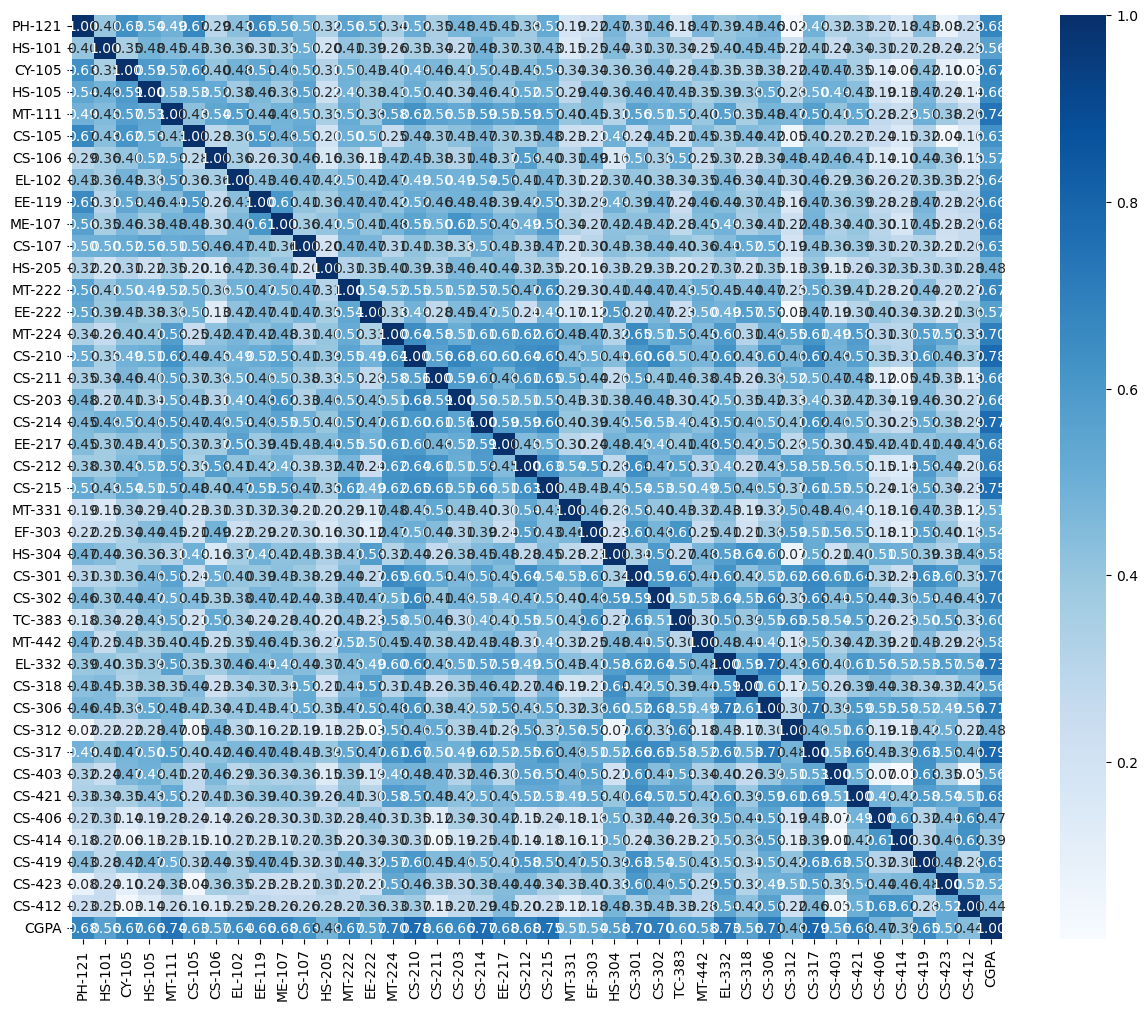

In [85]:
plt.figure(figsize=(15,12))
sns.heatmap(grades.corr(),annot = True, fmt = '.2f', cmap = 'Blues', cbar = True) ;

In [86]:
grades['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

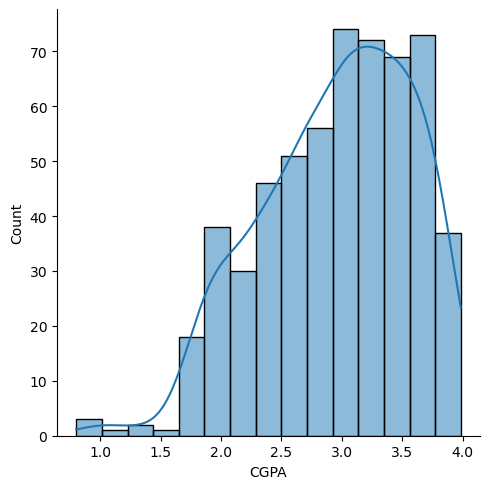

In [87]:
sns.displot(grades['CGPA'],kde = True);

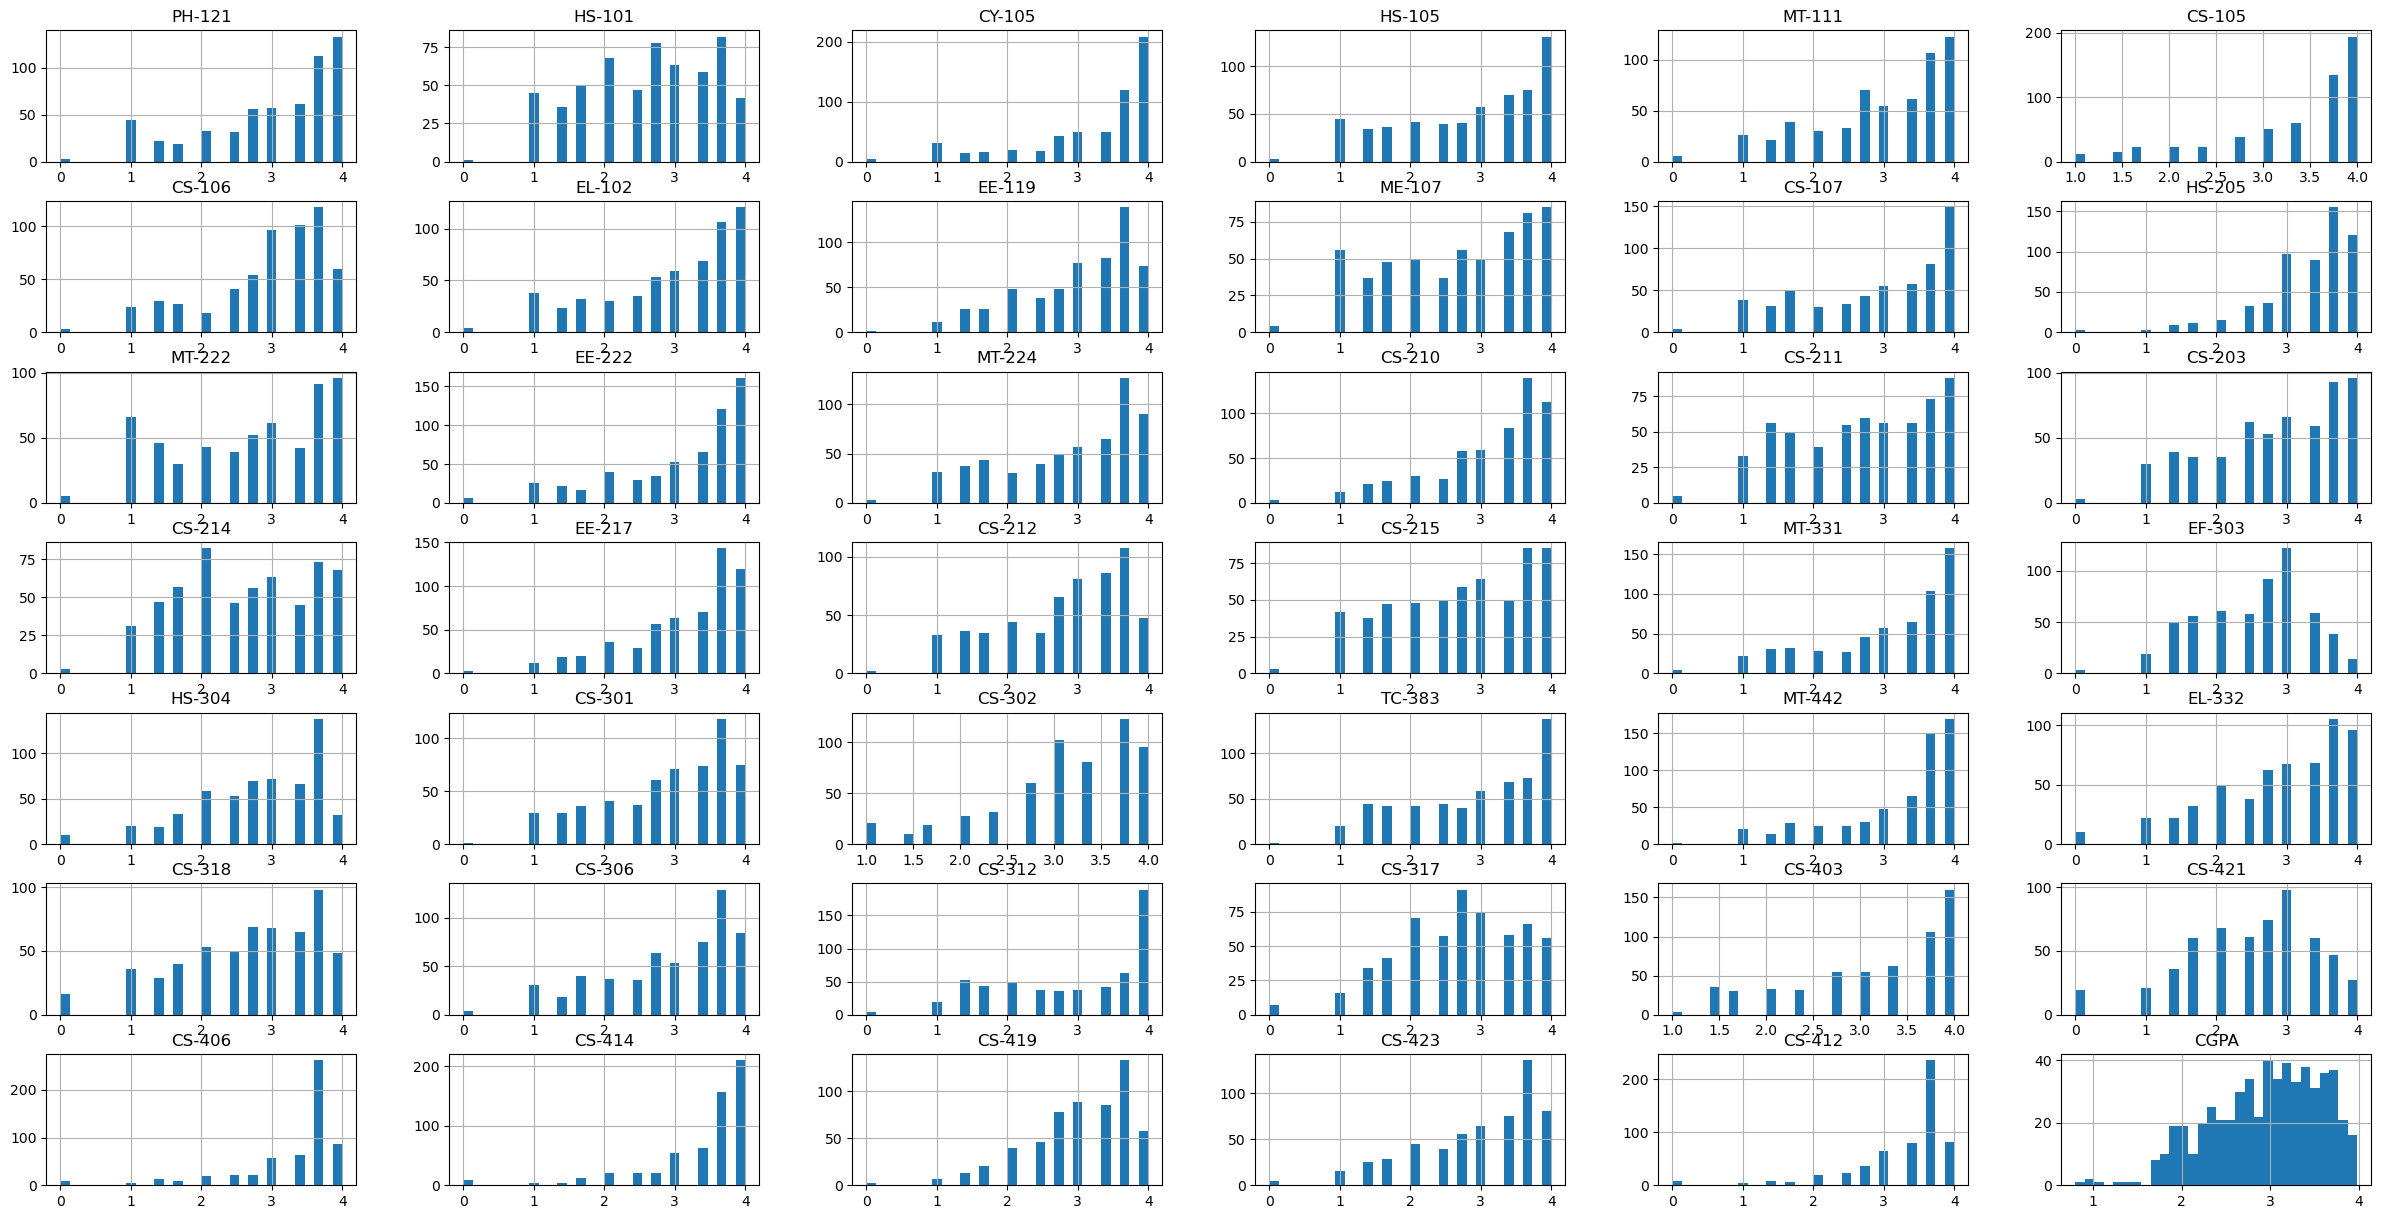

In [88]:
grades.hist(bins = 30 ,figsize = (30,15))
plt.show()

In [89]:
features = grades.drop(["CGPA"],axis = 1)
target = grades['CGPA']

In [90]:
df = pd.concat([features,target],axis=1)

In [91]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


# Spliting the data into First,Second,Third and Fourth Years

In [92]:
year_1 = features.iloc[ : , 0:11]
year_2 = features.iloc[ : , 12:22]
year_3 = features.iloc[ : , 23:34]
year_4 = features.iloc[ : , 34:41]

In [93]:
print(year_1.columns)
print(year_2.columns)
print(year_3.columns)
print(year_4.columns)

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107'],
      dtype='object')
Index(['MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215'],
      dtype='object')
Index(['EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332',
       'CS-318', 'CS-306', 'CS-312', 'CS-317'],
      dtype='object')
Index(['CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'], dtype='object')


In [94]:
mt = year_3['MT-442']
year_4th = pd.concat([year_4,mt],axis=1)


In [95]:
year_3.drop('MT-442',axis=1,inplace=True)

In [96]:
year_2 += year_1
year_3 += year_2
year_4th += year_3

# Model building for the First Years

## Spliting the data into Training and Testing

In [97]:
x = grades[list(year_1)].values
y = target.values

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [99]:
x_train.shape

(456, 11)

In [100]:
y_train.shape

(456,)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()

In [102]:
regressor.fit(x_train,y_train)
regressor_prediction = regressor.predict(x_test)
First_year_accuracy = metrics.r2_score(y_test,regressor_prediction)
print('Accuracy is :',First_year_accuracy*100)

Accuracy is : 84.7789533236089


# Model building for the Second Years

## Spliting the data into Training and Testing

In [103]:
x = grades[list(year_2)].values
y = target.values

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [105]:
regressor.fit(x_train,y_train)
regressor_prediction = regressor.predict(x_test)
Second_year_accuracy = metrics.r2_score(y_test,regressor_prediction)
print('Accuracy is :',Second_year_accuracy*100)

Accuracy is : 90.38182319073636


# Model building foe the Third Years

## Spliting the data into Training and Testing

In [106]:
x = grades[list(year_3)].values
y = target.values

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [108]:
regressor.fit(x_train,y_train)
regressor_prediction = regressor.predict(x_test)
Third_year_accuracy = metrics.r2_score(y_test,regressor_prediction)
print('Accuracy is :',Third_year_accuracy*100)

Accuracy is : 86.69751087967363


# Model Building for the Fourth Years

## Spliting the data into Training and Testing

In [109]:
x = grades[list(year_4th)].values
y = target.values

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [111]:
regressor.fit(x_train,y_train)
regressor_prediction = regressor.predict(x_test)
Fourth_year_accuracy = metrics.r2_score(y_test,regressor_prediction)
print('Accuracy is :',Fourth_year_accuracy*100)

Accuracy is : 73.07309361197578


In [112]:
print('For First Year students we get an Accuracy Score of : ',First_year_accuracy)
print('For Second Year students we get an Accuracy Score of : ',Second_year_accuracy)
print('For Third Year students we get an Accuracy Score of : ',Third_year_accuracy)
print('For Fourth Year students we get an Accuracy Score of : ',Fourth_year_accuracy)

For First Year students we get an Accuracy Score of :  0.847789533236089
For Second Year students we get an Accuracy Score of :  0.9038182319073635
For Third Year students we get an Accuracy Score of :  0.8669751087967363
For Fourth Year students we get an Accuracy Score of :  0.7307309361197578
